In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
data=pd.read_csv("CREDIT CARD USERS DATA.csv")

C:\Users\adity\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2728: DtypeWarning: Columns (2,19,21,49,87,88,102) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [15]:
for col in data.columns:
    data[col]=data[col].replace('#NULL!',np.nan)

In [4]:
data.replace()

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1.0,2.00,1.0,20.0,2.0,September,15.0,3.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0648-AIPJSP-UVM,5.0,5.00,0.0,22.0,2.0,May,17.0,4.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,5195-TLUDJE-HVO,3.0,4.00,1.0,67.0,6.0,June,14.0,2.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4459-VLPQUH-3OL,4.0,3.00,0.0,23.0,2.0,May,16.0,3.0,2.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
4,8158-SMTQFB-CNO,2.0,2.00,0.0,26.0,3.0,July,16.0,3.0,2.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,9662-FUSYIM-1IV,4.0,4.00,0.0,64.0,5.0,August,17.0,4.0,3.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,7432-QKQFJJ-K72,2.0,5.00,1.0,52.0,5.0,July,14.0,2.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,8959-RZWRHU-ST8,3.0,4.00,1.0,44.0,4.0,October,16.0,3.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,9124-DZALHM-S6I,2.0,3.00,1.0,66.0,6.0,October,12.0,2.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,3512-MUWBGY-52X,2.0,2.00,0.0,47.0,4.0,July,11.0,1.0,6.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
for col in data.columns:
    print(data[col].value_counts())

4287-JVUYUU-1CQ    1
4616-BCHPBF-WO8    1
2318-GCPSTT-9B0    1
5925-OWYQXP-AYO    1
0216-UIFHNQ-BJY    1
4588-ODXEGS-UGY    1
4631-NGDAQE-YYF    1
2340-KFPYAE-47B    1
0144-UFVNEK-87S    1
9081-LQKEHW-40Z    1
6969-QLKAFX-RZO    1
5635-KWELCP-JW9    1
5486-MVLAXH-P6G    1
1735-OEUNCV-OWO    1
3698-WEUKZD-C2Z    1
4956-VDMHXW-GKS    1
1440-RJDTZI-UQW    1
7407-AJDWBY-KEJ    1
6397-YQAAVP-R3B    1
3466-FEKGWX-30F    1
9321-FCPRGD-QA6    1
3279-UIFXHV-NMT    1
0008-ZIQQOT-SGB    1
0236-BKUNTH-6VO    1
8115-FDSICU-EKN    1
9803-GWCZVU-I7L    1
5714-IHLOXZ-QKC    1
0612-AVLPOY-PHN    1
9587-OELKTA-OVY    1
3824-HSMJTM-7OT    1
                  ..
7128-RXYOBT-DWK    1
5461-DIKJSU-PKA    1
3452-DOHASX-2US    1
9307-XSNCMT-QT9    1
7247-KCAQED-KLS    1
9407-JEVSSB-HYY    1
2852-YUIJSE-85D    1
1405-PZRQQU-MJF    1
0193-RZPXXT-4EU    1
1025-EBHXYE-1XP    1
2110-QHIRWX-GXY    1
9221-OXUFEY-119    1
6144-ILITLP-IL6    1
3699-ZFILHX-5WP    1
4002-UDERWL-K5I    1
7205-JSLZZU-M95    1
5367-GOJPVN-A

0.0    4383
1.0     617
Name: commutebike, dtype: int64
0.0    3081
1.0    1919
Name: commutewalk, dtype: int64
0.0    4708
1.0     292
Name: commutenonmotor, dtype: int64
0.0    4060
1.0     940
Name: telecommute, dtype: int64
9.0    4052
1.0     447
2.0     339
4.0     105
3.0      57
Name: reason, dtype: int64
4.0    1733
5.0     893
6.0     843
3.0     659
2.0     623
1.0     163
7.0      86
Name: polview, dtype: int64
0.0    3093
1.0    1907
Name: polparty, dtype: int64
0.0    3808
1.0    1192
Name: polcontrib, dtype: int64
1.0    2590
0.0    2410
Name: vote, dtype: int64
4.0    1344
2.0    1247
3.0    1200
1.0     986
5.0     223
Name: card, dtype: int64
4.0    1260
3.0    1257
1.0    1242
2.0    1241
Name: cardtype, dtype: int64
3.0    1274
4.0    1250
1.0    1245
2.0    1231
Name: cardbenefit, dtype: int64
0.0    4051
1.0     949
Name: cardfee, dtype: int64
3.0     246
1.0     228
2.0     220
4.0     193
5.0     188
6.0     176
7.0     163
8.0     158
11.0    158
9.0     153
13

0.00       1179
0.0         241
220.00       18
380.00       18
590.00       17
200.00       17
305.00       16
330.00       16
435.00       16
290.00       16
5.00         15
45.00        15
375.00       15
215.00       15
620.00       14
410.00       14
195.00       14
140.00       14
595.00       14
265.00       14
125.00       14
335.00       13
295.00       13
835.00       13
145.00       13
350.00       13
555.00       13
105.00       13
65.00        13
690.00       13
           ... 
1230.0        1
2485.00       1
6320.00       1
2360.00       1
570.0         1
1345.0        1
2285.00       1
2020.00       1
2565.0        1
3260.00       1
4620.00       1
2570.0        1
3745.00       1
11.00         1
2580.0        1
34.25         1
1335.0        1
1330.0        1
960.0         1
3370.0        1
1320.0        1
595.0         1
2050.0        1
1745.0        1
2305.00       1
1760.00       1
2600.00       1
1645.00       1
5085.00       1
5975.0        1
Name: cardten, Length: 1

In [7]:
data

,custid,region,townsize,gender,age,agecat,birthmonth,ed,edcat,jobcat,...,owncd,ownpda,ownpc,ownipod,owngame,ownfax,news,response_01,response_02,response_03
0,3964-QJWTRG-NPN,1.0,2.00,1.0,20.0,2.0,September,15.0,3.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1,0648-AIPJSP-UVM,5.0,5.00,0.0,22.0,2.0,May,17.0,4.0,2.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
2,5195-TLUDJE-HVO,3.0,4.00,1.0,67.0,6.0,June,14.0,2.0,2.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4459-VLPQUH-3OL,4.0,3.00,0.0,23.0,2.0,May,16.0,3.0,2.0,...,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
4,8158-SMTQFB-CNO,2.0,2.00,0.0,26.0,3.0,July,16.0,3.0,2.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,9662-FUSYIM-1IV,4.0,4.00,0.0,64.0,5.0,August,17.0,4.0,3.0,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,7432-QKQFJJ-K72,2.0,5.00,1.0,52.0,5.0,July,14.0,2.0,1.0,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,8959-RZWRHU-ST8,3.0,4.00,1.0,44.0,4.0,October,16.0,3.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,9124-DZALHM-S6I,2.0,3.00,1.0,66.0,6.0,October,12.0,2.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,3512-MUWBGY-52X,2.0,2.00,0.0,47.0,4.0,July,11.0,1.0,6.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
data.columns.values

array(['custid', 'region', 'townsize', 'gender', 'age', 'agecat',
       'birthmonth', 'ed', 'edcat', 'jobcat', 'union', 'employ', 'empcat',
       'retire', 'income', 'lninc', 'inccat', 'debtinc', 'creddebt',
       'lncreddebt', 'othdebt', 'lnothdebt', 'default', 'jobsat',
       'marital', 'spoused', 'spousedcat', 'reside', 'pets', 'pets_cats',
       'pets_dogs', 'pets_birds', 'pets_reptiles', 'pets_small',
       'pets_saltfish', 'pets_freshfish', 'homeown', 'hometype',
       'address', 'addresscat', 'cars', 'carown', 'cartype', 'carvalue',
       'carcatvalue', 'carbought', 'carbuy', 'commute', 'commutecat',
       'commutetime', 'commutecar', 'commutemotorcycle', 'commutecarpool',
       'commutebus', 'commuterail', 'commutepublic', 'commutebike',
       'commutewalk', 'commutenonmotor', 'telecommute', 'reason',
       'polview', 'polparty', 'polcontrib', 'vote', 'card', 'cardtype',
       'cardbenefit', 'cardfee', 'cardtenure', 'cardtenurecat', 'card2',
       'card2type', 'ca

In [16]:
total = data.isnull().sum(axis=0).sort_values(ascending=False)
percent = ((data.isnull().sum(axis=0)/data.isnull().count(axis=0))*100).sort_values(ascending=False)

# count the number of null values in the column and their perecentage of the total data
missing_data_columns = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_columns.head(20)

,Total,Percent
lnwireten,3656,73.12
lnwiremon,3656,73.12
lnequipmon,3296,65.92
lnequipten,3296,65.92
lntollten,2622,52.44
lntollmon,2622,52.44
lncardten,1422,28.44
lncardmon,1419,28.38
lnlongten,3,0.06
longten,3,0.06


In [17]:
data.drop(['lnwireten','lnwiremon','lnequipmon','lnequipten','lntollten','lntollmon'],axis=1,inplace=True)

In [18]:
total = data.isnull().sum(axis=0).sort_values(ascending=False)
percent = ((data.isnull().sum(axis=0)/data.isnull().count(axis=0))*100).sort_values(ascending=False)

# count the number of null values in the column and their perecentage of the total data
missing_data_columns = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_columns.head(20)

,Total,Percent
lncardten,1422,28.44
lncardmon,1419,28.38
lnlongten,3,0.06
longten,3,0.06
commutetime,2,0.04
cardten,2,0.04
townsize,2,0.04
lnothdebt,1,0.02
lncreddebt,1,0.02
pets_freshfish,0,0.00


In [19]:
from sklearn.preprocessing import Imputer
imp_mean = Imputer(missing_values = 'NaN', strategy='mean')
imp_mean.fit(data[['lncardten']])
data['lncardten'] = imp_mean.transform(data[['lncardten']])

In [20]:
imp_mean = Imputer(missing_values = 'NaN', strategy='mean')
imp_mean.fit(data[['lncardmon']])
data['lncardmon'] = imp_mean.transform(data[['lncardmon']])

In [21]:
data = data.dropna(how='any')
data.shape

(4994, 126)

In [22]:
total = data.isnull().sum(axis=0).sort_values(ascending=False)
percent = ((data.isnull().sum(axis=0)/data.isnull().count(axis=0))*100).sort_values(ascending=False)

# count the number of null values in the column and their perecentage of the total data
missing_data_columns = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_columns.head(20)

,Total,Percent
response_03,0,0.0
carbuy,0,0.0
pets_small,0,0.0
pets_saltfish,0,0.0
pets_freshfish,0,0.0
homeown,0,0.0
hometype,0,0.0
address,0,0.0
addresscat,0,0.0
cars,0,0.0


In [23]:
data.index=data.custid

In [24]:
target_variable=data['cardspent']+data['card2spent']

Text(0,0.5,'Credit spent on both cards')

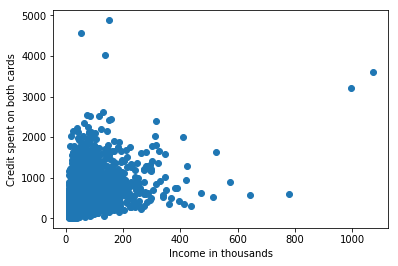

In [25]:
plt.scatter(data['income'],target_variable)
plt.xlabel('Income in thousands')
plt.ylabel('Credit spent on both cards')

In [ ]:
plt.scatter(data['ed'],target_variable)
plt.grid()
plt.xlabel('Years of education')
plt.ylabel('Credit spent on both cards')

In [ ]:
data['jobcat'].value_counts()


In [ ]:
plt.grid()
plt.xlabel('Job category')
plt.ylabel('Credit spent on both cards')
plt.scatter(data['jobcat'],target_variable)

In [ ]:
plt.scatter(data['union'],target_variable)
plt.xlabel('Union member')
plt.ylabel('Credit spent on both cards')

In [ ]:
plt.grid()
plt.scatter(data['retire'],target_variable)
plt.xlabel('Retired')
plt.ylabel('Credit spent on both cards')

In [ ]:
plt.grid()
plt.scatter(data['employ'],target_variable)
plt.xlabel('Years with current employer')
plt.ylabel('Credit spent on both cards')

In [ ]:
plt.grid()
plt.scatter(data['empcat'],target_variable)
plt.xlabel('Employ category')
plt.ylabel('Credit spent on both cards')

In [ ]:
plt.grid()
plt.scatter(data['debtinc'],target_variable)
plt.xlabel('Debt to income ratio %')
plt.ylabel('Credit spent on both cards')

In [ ]:
plt.grid()
plt.scatter(data['creddebt'],target_variable)
plt.xlabel('Credit card debt in thousands')
plt.ylabel('Credit spent on both cards')

In [ ]:
plt.grid()
plt.scatter(data['othdebt'],target_variable)
plt.xlabel('Other debt in thousands')
plt.ylabel('Credit spent on both cards')

In [ ]:
plt.grid()
plt.scatter(data['default'],target_variable)
plt.xlabel('Ever defaulted on bank loan')
plt.ylabel('Credit spent on both cards')

In [ ]:
plt.grid()
plt.scatter(data['jobsat'],target_variable)
plt.xlabel('Job satisfaction')
plt.ylabel('Credit spent on both cards')

In [ ]:
plt.grid()
plt.scatter(data['marital'],target_variable)
plt.xlabel('Marital status')
plt.ylabel('Credit spent on both cards')

In [ ]:
plt.grid()
plt.scatter(data['spoused'],target_variable)
plt.xlabel('Spouse years of education')
plt.ylabel('Credit spent on both cards')

In [ ]:
data['spoused'].value_counts()

In [ ]:
plt.grid()
plt.scatter(data['spousedcat'],target_variable)
plt.xlabel('Spouse level of education')
plt.ylabel('Credit spent on both cards')

In [ ]:
plt.grid()
plt.scatter(data['reside'],target_variable)
plt.xlabel('No. of people in household')
plt.ylabel('Credit spent on both cards')

In [ ]:
plt.grid()
plt.scatter(data['homeown'],target_variable)
plt.xlabel('Home ownership')
plt.ylabel('Credit spent on both cards')

In [ ]:
plt.grid()
plt.scatter(data['hometype'],target_variable)
plt.xlabel('Building type')
plt.ylabel('Credit spent on both cards')

In [ ]:
plt.grid()
plt.scatter(data['address'],target_variable)
plt.xlabel('Years at current address')
plt.ylabel('Credit spent on both cards')

In [ ]:
plt.grid()
plt.scatter(data['cars'],target_variable)
plt.xlabel('Cars owned')
plt.ylabel('Credit spent on both cards')

In [ ]:
plt.grid()
plt.scatter(data['carown'],target_variable)
plt.xlabel('Primary vehicle lease/own')
plt.ylabel('Credit spent on both cards')

In [ ]:
plt.grid()
plt.scatter(data['cartype'],target_variable)
plt.xlabel('Primary vehicle Domestic/import')
plt.ylabel('Credit spent on both cards')

In [ ]:
plt.grid()
plt.scatter(data['carvalue'],target_variable)
plt.xlabel('Primary vehicle sticker price')
plt.ylabel('Credit spent on both cards')

In [ ]:
plt.grid()
plt.scatter(data['carcatvalue'],target_variable)
plt.xlabel('Primary vehicle price category')
plt.ylabel('Credit spent on both cards')

In [ ]:
plt.grid()
plt.scatter(data['carbought'],target_variable)
plt.xlabel('Primary vehicle bought/leased within last year')
plt.ylabel('Credit spent on both cards')

In [ ]:
plt.grid()
plt.scatter(data['carbuy'],target_variable)
plt.xlabel('Primary vehicle bought/leased within next year')
plt.ylabel('Credit spent on both cards')

In [ ]:
plt.grid()
plt.scatter(data['commute'],target_variable)
plt.xlabel('Primary commute transportation')
plt.ylabel('Credit spent on both cards')

In [ ]:
plt.grid()
plt.scatter(data['commutecar'],target_variable)
plt.xlabel('Used car to commute within last year')
plt.ylabel('Credit spent on both cards')

In [ ]:
plt.grid()
plt.scatter(data['commutemotorcycle'],target_variable)
plt.xlabel('Used motorcycle to commute within last year')
plt.ylabel('Credit spent on both cards')

In [ ]:
plt.grid()
plt.scatter(data['commutebus'],target_variable)
plt.xlabel('Used bus to commute within last year')
plt.ylabel('Credit spent on both cards')

In [ ]:
plt.grid()
plt.scatter(data['commutebike'],target_variable)
plt.xlabel('Used bike to commute within last year')
plt.ylabel('Credit spent on both cards')

In [ ]:
plt.grid()
plt.scatter(data['reason'],target_variable)
plt.xlabel('Reason for being a customer here')
plt.ylabel('Credit spent on both cards')

In [ ]:
plt.grid()
plt.scatter(data['polview'],target_variable)
plt.xlabel('Political views')
plt.ylabel('Credit spent on both cards')

In [ ]:
plt.grid()
plt.scatter(data['card'],target_variable)
plt.xlabel('Primary credit card')
plt.ylabel('Credit spent on both cards')

In [ ]:
plt.grid()
plt.scatter(data['cardtype'],target_variable)
plt.xlabel('Designation of primary credit card')
plt.ylabel('Credit spent on both cards')

In [ ]:
plt.grid()
plt.scatter(data['cardfee'],target_variable)
plt.xlabel('Card fee')
plt.ylabel('Credit spent on both cards')

In [ ]:
plt.grid()
plt.scatter(data['cardtenure'],target_variable)
plt.xlabel('Years held primary card')
plt.ylabel('Credit spent on both cards')

In [ ]:
plt.grid()
plt.scatter(data['card2'],target_variable)
plt.xlabel('Secondary card')
plt.ylabel('Credit spent on both cards')

In [ ]:
plt.grid()
plt.scatter(data['card2type'],target_variable)
plt.xlabel('Designation of secondary card')
plt.ylabel('Credit spent on both cards')

In [ ]:
plt.grid()
plt.scatter(data['card2fee'],target_variable)
plt.xlabel('Annual fee for secondary credit card')
plt.ylabel('Credit spent on both cards')

In [ ]:
plt.grid()
plt.scatter(data['card2tenure'],target_variable)
plt.xlabel('Years held secondary card')
plt.ylabel('Credit spent on both cards')

In [ ]:
plt.grid()
plt.scatter(data['churn'],target_variable)
plt.xlabel('Switched providers within last month')
plt.ylabel('Credit spent on both cards')

In [ ]:
plt.grid()
plt.scatter(data['churn'],target_variable)
plt.xlabel('Switched providers within last month')
plt.ylabel('Credit spent on both cards')

In [ ]:
plt.grid()
plt.scatter(data['response_01'],target_variable)
plt.xlabel('Response to product offer 01')
plt.ylabel('Credit spent on both cards')

In [ ]:
plt.grid()
plt.scatter(data['response_02'],target_variable)
plt.xlabel('Response to product offer 02')
plt.ylabel('Credit spent on both cards')

In [ ]:
plt.grid()
plt.scatter(data['response_03'],target_variable)
plt.xlabel('Response to product offer 03')
plt.ylabel('Credit spent on both cards')

In [ ]:
plt.grid()
plt.scatter(data['birthmonth'],target_variable)
plt.xlabel('Birth month')
plt.ylabel('Credit spent on both cards')

In [26]:
data.drop(['cardspent','card2spent'],axis=1,inplace=True)

In [27]:
data.drop('custid',axis=1,inplace=True)

In [28]:
data.drop('birthmonth',axis=1,inplace=True)

In [29]:
data.shape

(4994, 122)

In [30]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test= train_test_split(data,target_variable,test_size=0.2,random_state=0)

C:\Users\adity\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [31]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

C:\Users\adity\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [39]:
# Recursive Feature Elimination


# create a base classifier used to evaluate a subset of attributes
model = RandomForestRegressor(n_estimators=10,n_jobs=-1)
X, y = X_train, y_train
# create the RFE model and select 50 attributes
rfe = RFE(model, n_features_to_select=50)
rfe = rfe.fit(X, y)

# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

[ True  True False  True False  True False  True False  True False False
  True  True False  True  True  True  True  True False  True False  True
 False False  True  True  True False False False False False False  True
  True False  True False False  True False False False  True False  True
 False False False False False False False False False False False  True
 False False False  True  True  True False  True False  True  True  True
 False  True False  True  True False False  True False  True  True  True
  True False  True  True False  True  True False  True  True  True  True
 False  True False False False False False False False False False False
 False  True False False False False False False False False False False
 False False]
[ 1  1 16  1 25  1  8  1 26  1 24 71  1  1 52  1  1  1  1  1 30  1 61  1
  9  6  1  1  1 13 14 27 70  2 17  1  1 20  1 41 19  1 64 15 21  1 23  1
 53 40 31 18 32 50 37 10 62 38 11  1 22 12 39  1  1  1 44  1 48  1  1  1
 43  1 46  1  1 28  7  1 58  1  1  1 

In [33]:
y_pred=rfe.predict(X_test)

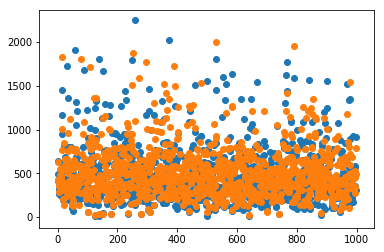

In [45]:
plt.scatter(range(len(y_pred)),y_test)
plt.scatter(range(len(y_pred)),y_pred)

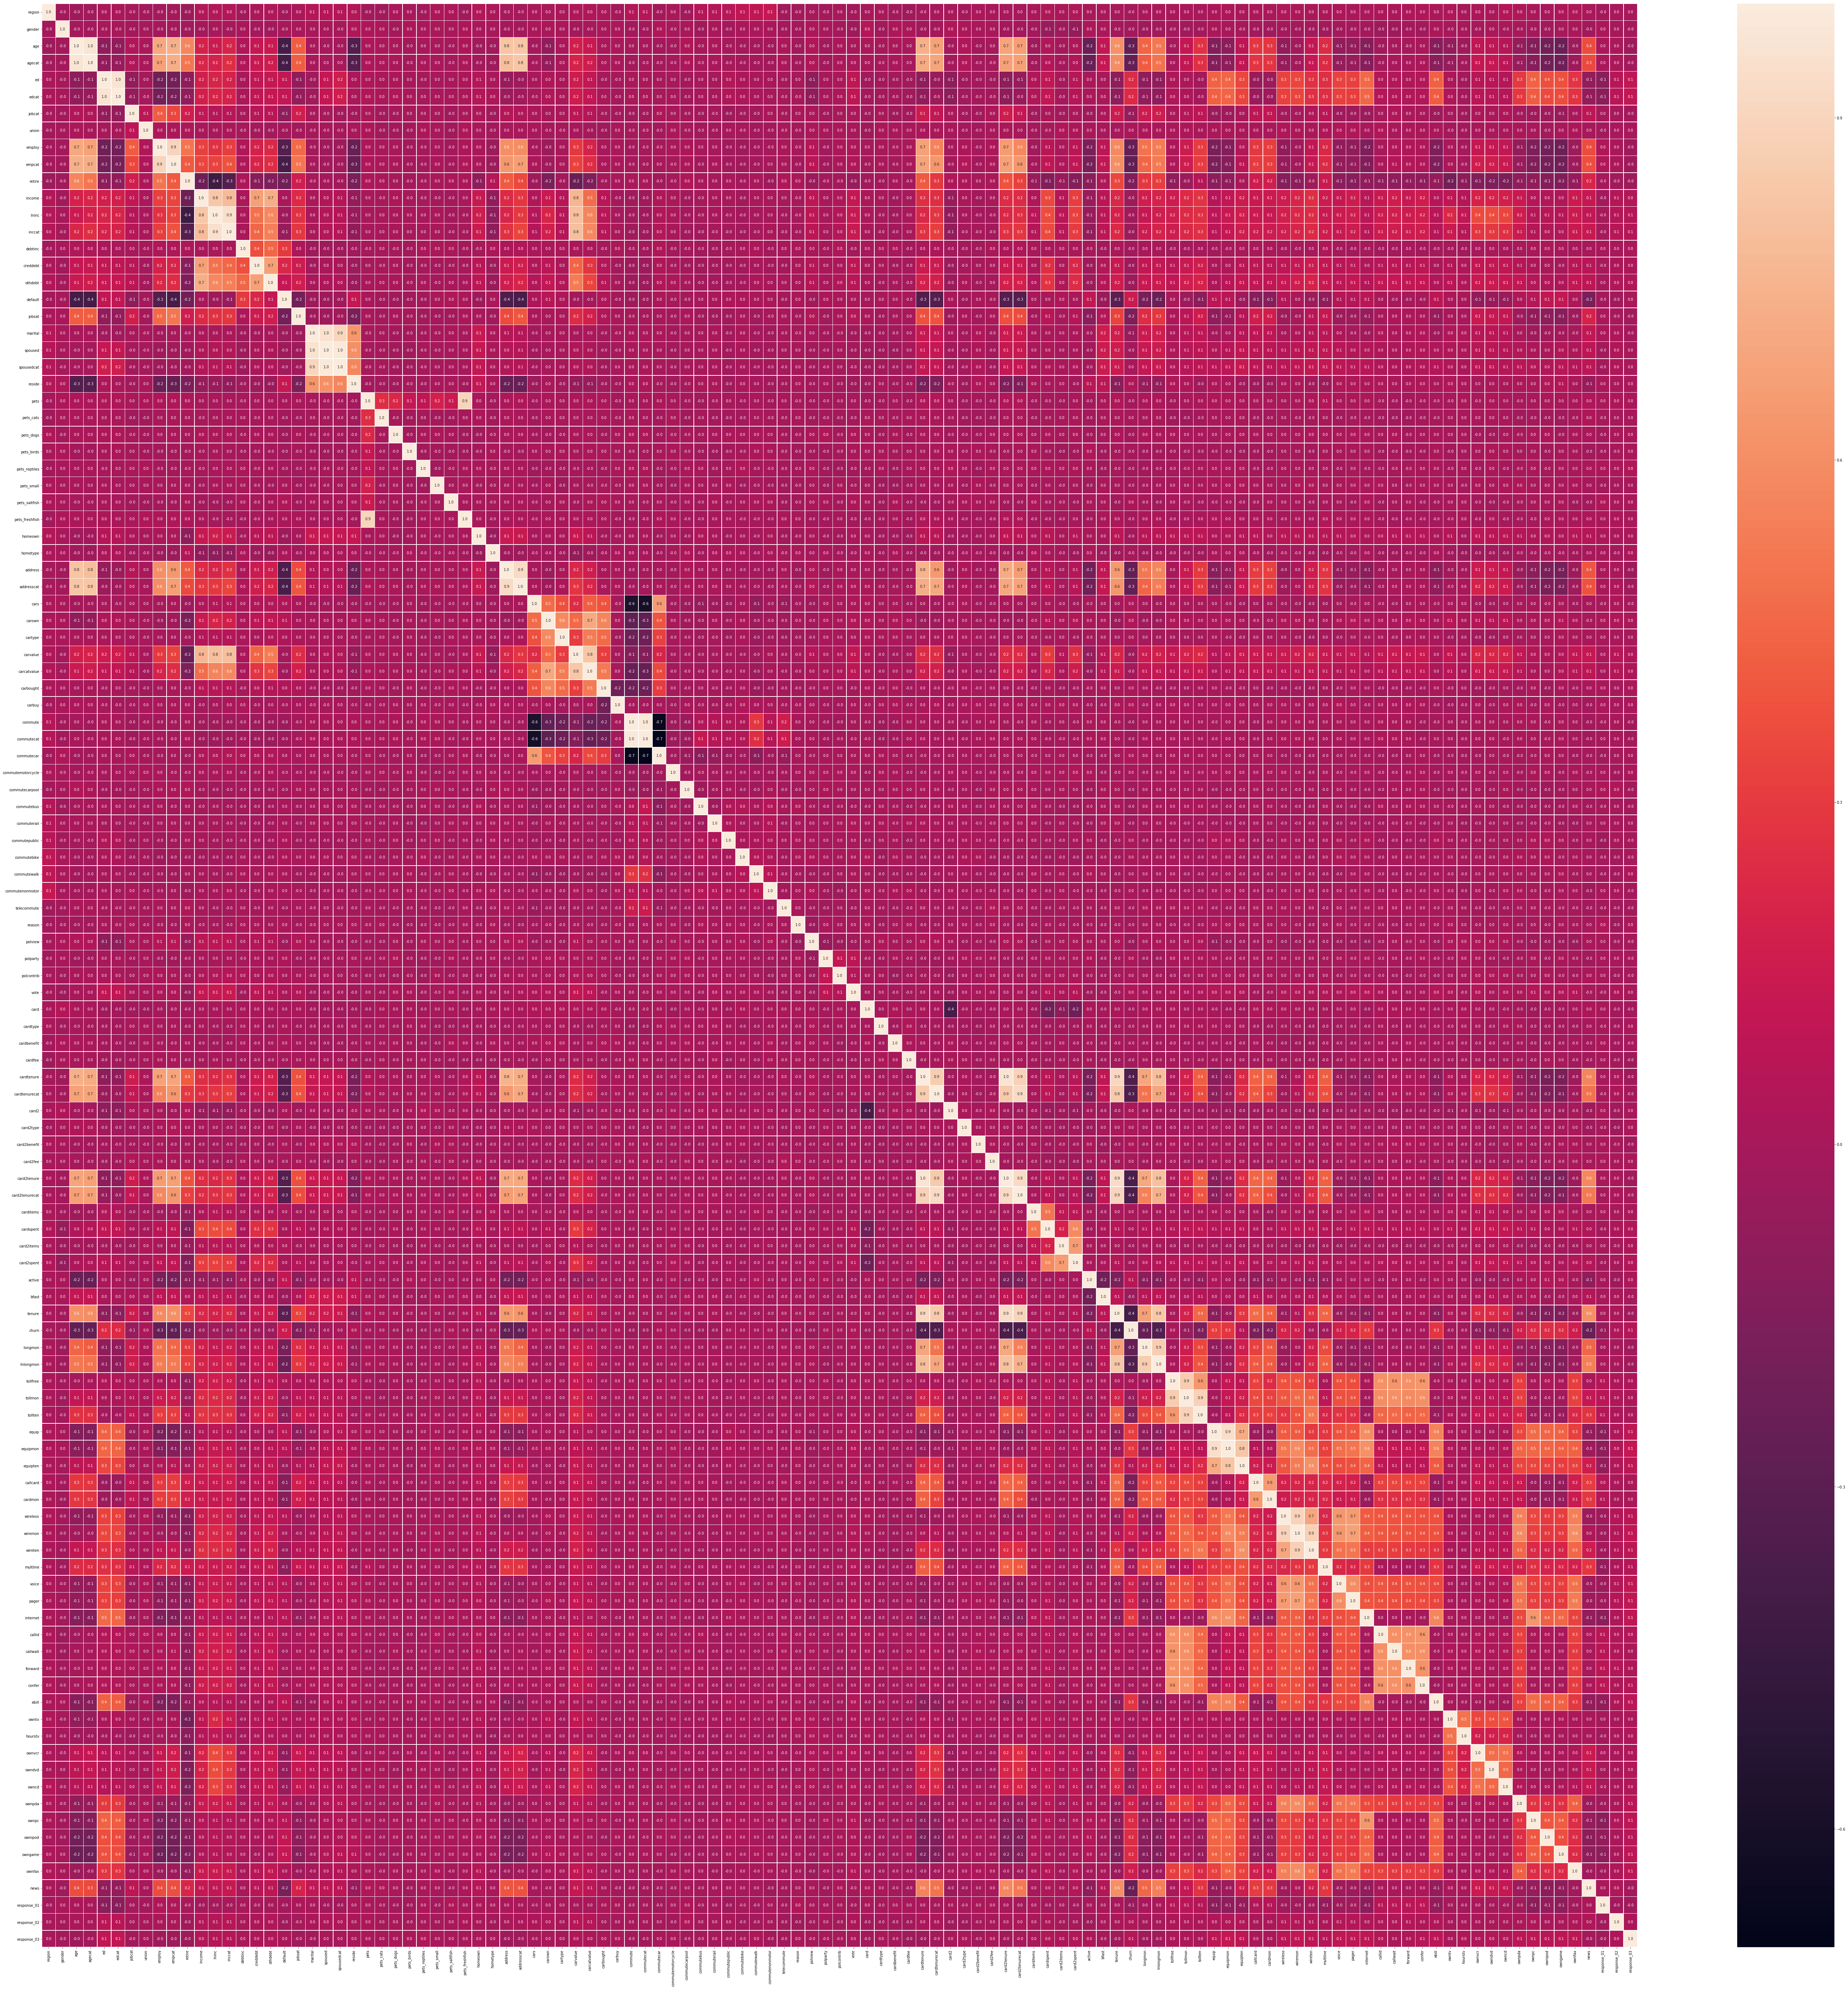

In [14]:
f,ax = plt.subplots(figsize=(100,100))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)